In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
df=pd.read_csv("../input/60k-stack-overflow-questions-with-quality-rate/train.csv")

In [3]:
df_valid=pd.read_csv('../input/60k-stack-overflow-questions-with-quality-rate/valid.csv')

In [4]:
df_valid.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
1,34554721,Retrieve all except some data of the another t...,I have two table m_master and tbl_appointment\...,<php><mysql><sql><codeigniter><mysqli>,2016-01-01 08:43:50,LQ_EDIT
2,34555135,Pandas: read_html,<p>I'm trying to extract US states from wiki U...,<python><pandas>,2016-01-01 09:55:22,HQ
3,34555448,Reader Always gimme NULL,"I'm so new to C#, I wanna make an application ...",<sql-server><c#-4.0>,2016-01-01 10:43:45,LQ_EDIT
4,34555752,php rearrange array elements based on condition,basically i have this array:\r\n\r\n array(...,<php>,2016-01-01 11:34:09,LQ_EDIT


In [5]:
df_valid.shape

(15000, 6)

lets have 1 fold of df_valid for test and remaining for valid

In [6]:
df.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


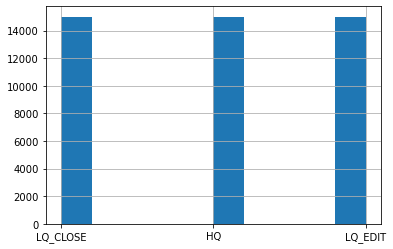

In [7]:
df['Y'].hist()

In [8]:

from tensorflow.keras.utils import to_categorical


In [9]:
import re

In [10]:
from tqdm import tqdm

In [11]:
import numpy as np


In [12]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Dropout,Input

In [13]:
!pip install transformers

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [14]:
from transformers import TFBertModel,BertTokenizer,BertConfig,RobertaConfig,TFRobertaModel,RobertaTokenizer

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [15]:
#tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')

In [16]:
#tokenizer.tokenize(text=str(df.iloc[0,1]),text_pair=str(df.iloc[0,2]))

In [17]:
df.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


In [18]:
data=df.drop(['Id','CreationDate','Tags'],axis=1)
valid_data=df_valid.drop(['Id','CreationDate','Tags'],axis=1)

In [19]:
data.head()

,Title,Body,Y
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,LQ_CLOSE
1,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,HQ
2,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,HQ
3,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",HQ
4,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,HQ


In [20]:
def preprocess(sample):
  text=re.sub(r'<(p|/p)>',' ',sample)
  text=re.sub(r'\n','',text)
  text=re.sub(r'[^A-Za-z0-9]',' ',text)
  text=re.sub(r" +",' ',text)
  yield text.lower()
for i in tqdm(range(data.shape[0])):
  data.iloc[i,0]=next(preprocess(str(data.iloc[i,0])))
  data.iloc[i,1]=next(preprocess(str(data.iloc[i,1])))
for i in tqdm(range(valid_data.shape[0])):
  valid_data.iloc[i,0]=next(preprocess(str(valid_data.iloc[i,0])))
  valid_data.iloc[i,1]=next(preprocess(str(valid_data.iloc[i,1])))


100%|██████████| 15000/15000 [00:11<00:00, 1306.32it/s]


In [21]:
data['Y']=data['Y'].map({'LQ_CLOSE':0,'LQ_EDIT':1,'HQ':2})
valid_data['Y']=valid_data['Y'].map({'LQ_CLOSE':0,'LQ_EDIT':1,'HQ':2})

In [22]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
x=valid_data[['Title','Body']].values
y=valid_data['Y'].values
valid_data['kfolds']=-1
for i,(train,test) in enumerate(kf.split(x,y)):
  valid_data.loc[test,'kfolds']=i

In [23]:
validation=valid_data[valid_data['kfolds']!=0].drop('kfolds',axis=1).reset_index(drop=True)
testing=valid_data[valid_data['kfolds']==0].drop('kfolds',axis=1).reset_index(drop=True)

In [24]:

from tqdm import tqdm

In [25]:
import seaborn as sn

In [26]:
#l=[]
#for i in tqdm(range(data.shape[0])):
#  l.append(len(['[CLS]']+tokenizer.tokenize(str(data.loc[i,'Title']))+['[SEP]']+tokenizer.tokenize(str(data.loc[i,'Body']))+['SEP']))
#sn.displot(l)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
#plt.figure(figsize=(12,5))
#sn.distplot(l)
#plt.xlim(0,600)

In [29]:
#pd.Series(l).describe()

In [30]:
#maxlen=400#give an even number

In [31]:
#def get_data(sent1,sent2,maxlen=400):
#  temp=['[CLS]']+tokenizer.tokenize(sent1)+['[SEP]']+tokenizer.tokenize(sent2)+['[SEP]']
#  currlen=len(temp)
#  if currlen<=maxlen:
#    reqlen=maxlen-currlen
#    total_tokens=['[CLS]']+tokenizer.tokenize(sent1)+['[SEP]']+tokenizer.tokenize(sent2)+['[SEP]']+['[PAD]']*reqlen
#  else:
#    len1=int((maxlen-4)/2)
#    len2=int((maxlen-4)/2)+1
#    if len(['[CLS]]']+tokenizer.tokenize(sent1)[:len1]+['[SEP]']+tokenizer.tokenize(sent2)[:len2]+['[SEP]'])==maxlen:          ## ex::512-4=508->sent1==254 and sent2==254
#      total_tokens=['[CLS]]']+tokenizer.tokenize(sent1)[:len1]+['[SEP]']+tokenizer.tokenize(sent2)[:len2]+['[SEP]']
#    elif len(tokenizer.tokenize(sent1))>=len1 and len(tokenizer.tokenize(sent2))<len2:
#      ##one sentence is short and other is big
#      reqlen=maxlen-3-len(tokenizer.tokenize(sent2))
#      total_tokens=['[CLS]]']+tokenizer.tokenize(sent1)[:reqlen]+['[SEP]']+tokenizer.tokenize(sent2)+['[SEP]']
#    else:
#      reqlen=maxlen-3-len(tokenizer.tokenize(sent1))
#      total_tokens=['[CLS]]']+tokenizer.tokenize(sent1)+['[SEP]']+tokenizer.tokenize(sent2)[:reqlen]+['[SEP]']
#  input_ids=tokenizer.convert_tokens_to_ids(total_tokens)
#  attention_mask= np.char.not_equal('[PAD]',total_tokens).astype('int')
#  token_type_ids=[]
#  currseg=0
#  for tok in total_tokens:
#    if tok=='[SEP]':
#      token_type_ids.append(currseg)
#      currseg=1-currseg
#    else:
#      token_type_ids.append(currseg)
#  return input_ids,attention_mask,token_type_ids
###########################
#X1=np.empty((data.shape[0],maxlen),dtype=np.int32)
#X2=np.empty((data.shape[0],maxlen),dtype=np.int32)
#X3=np.empty((data.shape[0],maxlen),dtype=np.int32)
#Y=np.empty((data.shape[0],3))
#for i in tqdm(range(data.shape[0])):
#  outputs=get_data(str(data.loc[i,'Title']),str(data.loc[i,'Body']))
#  X1[i,]=outputs[0]
#  X2[i,]=outputs[1]
#  X3[i,]=outputs[2]
#  Y[i,]=to_categorical(int(data.loc[i,'Y']),num_classes=3)
#model_inputs,model_outputs={'input_ids':X1,'attention_mask':X2,'token_type_ids':X3},Y
#######################################validation
#X1=np.empty((validation.shape[0],maxlen),dtype=np.int32)
#X2=np.empty((validation.shape[0],maxlen),dtype=np.int32)
#X3=np.empty((validation.shape[0],maxlen),dtype=np.int32)
#Y=np.empty((validation.shape[0],3))
#for i in tqdm(range(validation.shape[0])):
#  outputs=get_data(str(validation.loc[i,'Title']),str(validation.loc[i,'Body']))
#  X1[i,]=outputs[0]
#  X2[i,]=outputs[1]
#  X3[i,]=outputs[2]
#  Y[i,]=to_categorical(int(validation.loc[i,'Y']),num_classes=3)
#valid_inputs,valid_outputs={'input_ids':X1,'attention_mask':X2,'token_type_ids':X3},Y
########################################testing
#X1=np.empty((testing.shape[0],maxlen),dtype=np.int32)
#X2=np.empty((testing.shape[0],maxlen),dtype=np.int32)
#X3=np.empty((testing.shape[0],maxlen),dtype=np.int32)
#Y=np.empty((testing.shape[0],3))
#for i in tqdm(range(testing.shape[0])):
#  outputs=get_data(str(testing.loc[i,'Title']),str(testing.loc[i,'Body']))
#  X1[i,]=outputs[0]
#  X2[i,]=outputs[1]
#  X3[i,]=outputs[2]
#  Y[i,]=to_categorical(int(testing.loc[i,'Y']),num_classes=3)
#test_inputs,test_outputs={'input_ids':X1,'attention_mask':X2,'token_type_ids':X3},Y

In [32]:
#model_inputs,model_outputs

In [33]:
#valid_inputs,valid_outputs


In [34]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.0.0.2:8470
REPLICAS:  8


In [35]:
#tf.keras.backend.clear_session()

In [36]:
#with strategy.scope():
#  bert_config=BertConfig.from_pretrained('bert-base-uncased')
#  pre_model=TFBertModel(bert_config)
#  ins1=Input((maxlen,),dtype=tf.int32,name='input_ids')
#  ins2=Input((maxlen,),dtype=tf.int32,name='attention_mask')
#  ins3=Input((maxlen,),dtype=tf.int32,name='token_type_ids')
#  pre_layers=pre_model({'input_ids':ins1,'token_type_ids':ins2,'attention_mask':ins3})
#  outs=Dense(3,activation='softmax')(pre_layers[1])
#  model=Model(inputs={'input_ids':ins1,'attention_mask':ins2,'token_type_ids':ins3},outputs=outs)
#  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
#batch1=8*strategy.num_replicas_in_sync
#batch2=4*strategy.num_replicas_in_sync
#
#tf.keras.utils.plot_model(model,show_layer_names=True,show_shapes=True)
#

In [38]:
#saving=tf.keras.callbacks.ModelCheckpoint('bert.h5',save_best_only=True,save_weights_only=True,verbose=1,mode='min',monitor='val_loss')
#model.fit(x=model_inputs,y=model_outputs,validation_data=(valid_inputs,valid_outputs),epochs=20,batch_size=batch1,validation_batch_size=batch2,callbacks=[saving])

bert doesn't worked well. lets try roberta

roberta


In [39]:
r_tokenizer=RobertaTokenizer.from_pretrained('roberta-base')

In [40]:
l=[]
for i in tqdm(range(data.shape[0])):
  l.append(len(['<s>']+r_tokenizer.tokenize(" "+str(data.loc[i,'Title']))+['</s>']+['</s>']+r_tokenizer.tokenize(" "+str(data.loc[i,'Body']))+['</s>']))

100%|██████████| 45000/45000 [00:55<00:00, 810.75it/s] 


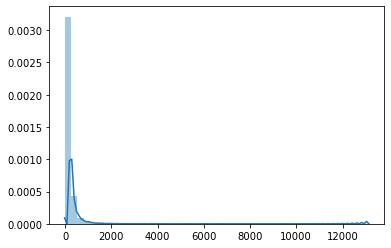

In [41]:
sn.distplot(l)

(0.0, 600.0)

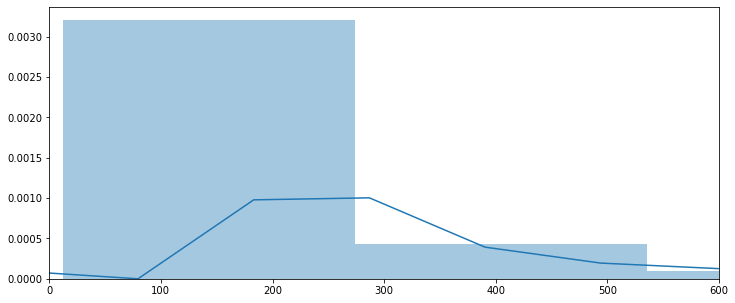

In [42]:
plt.figure(figsize=(12,5))
sn.distplot(l)
plt.xlim(0,600)

In [43]:
pd.Series(l).describe()

count    45000.000000
mean       190.493578
std        284.161988
min         12.000000
25%         77.000000
50%        123.000000
75%        208.000000
max      13105.000000
dtype: float64

In [44]:
maxlen=218

In [45]:
def get_data(sent1,sent2,maxlen=218):
  temp=['<s>']+r_tokenizer.tokenize(sent1)+['</s>']+['</s>']+r_tokenizer.tokenize(sent2)+['</s>']
  currlen=len(temp)
  if currlen<=maxlen:
    reqlen=maxlen-currlen
    total_tokens=['<s>']+r_tokenizer.tokenize(sent1)+['</s>']+['</s>']+r_tokenizer.tokenize(sent2)+['</s>']+['[PAD]']*reqlen
  else:
    len1=int((maxlen-4)/2)
    len2=int((maxlen-4)/2)
    if len(['<s>']+r_tokenizer.tokenize(sent1)[:len1]+['</s>']+['</s>']+r_tokenizer.tokenize(sent2)[:len2]+['</s>'])==maxlen:          ## ex::512-4=508->sent1==254 and sent2==254
      total_tokens=['<s>']+r_tokenizer.tokenize(sent1)[:len1]+['</s>']+['</s>']+r_tokenizer.tokenize(sent2)[:len2]+['</s>']
    elif len(r_tokenizer.tokenize(sent1))>=len1 and len(r_tokenizer.tokenize(sent2))<len2:
      ##one sentence is short and other is big
      reqlen=maxlen-4-len(r_tokenizer.tokenize(sent2))
      total_tokens=['<s>']+r_tokenizer.tokenize(sent1)[:reqlen]+['</s>']+['</s>']+r_tokenizer.tokenize(sent2)+['</s>']
    else:
      reqlen=maxlen-4-len(r_tokenizer.tokenize(sent1))
      total_tokens=['<s>']+r_tokenizer.tokenize(sent1)+['</s>']+['</s>']+r_tokenizer.tokenize(sent2)[:reqlen]+['</s>']
  input_ids=r_tokenizer.convert_tokens_to_ids(total_tokens)
  attention_mask= np.char.not_equal('[PAD]',total_tokens).astype('int')
  return input_ids,attention_mask
##########################
X1=np.empty((data.shape[0],maxlen),dtype=np.int32)
X2=np.empty((data.shape[0],maxlen),dtype=np.int32)
Y=np.empty((data.shape[0],3))
for i in tqdm(range(data.shape[0])):
  outputs=get_data(" "+str(data.loc[i,'Title'])," "+str(data.loc[i,'Body']))
  X1[i,]=outputs[0]
  X2[i,]=outputs[1]
  Y[i,]=to_categorical(int(data.loc[i,'Y']),num_classes=3)
model_inputs,model_outputs={'input_ids':X1,'attention_mask':X2},Y
######################################validation
X1=np.empty((validation.shape[0],maxlen),dtype=np.int32)
X2=np.empty((validation.shape[0],maxlen),dtype=np.int32)
Y=np.empty((validation.shape[0],3))
for i in tqdm(range(validation.shape[0])):
  outputs=get_data(" "+str(validation.loc[i,'Title'])," "+str(validation.loc[i,'Body']))
  X1[i,]=outputs[0]
  X2[i,]=outputs[1]
  Y[i,]=to_categorical(int(validation.loc[i,'Y']),num_classes=3)
valid_inputs,valid_outputs={'input_ids':X1,'attention_mask':X2},Y
#######################################testing
X1=np.empty((testing.shape[0],maxlen),dtype=np.int32)
X2=np.empty((testing.shape[0],maxlen),dtype=np.int32)
Y=np.empty((testing.shape[0],3))
for i in tqdm(range(testing.shape[0])):
  outputs=get_data(" "+str(testing.loc[i,'Title'])," "+str(testing.loc[i,'Body']))
  X1[i,]=outputs[0]
  X2[i,]=outputs[1]
  Y[i,]=to_categorical(int(testing.loc[i,'Y']),num_classes=3)
test_inputs,test_outputs={'input_ids':X1,'attention_mask':X2},Y

100%|██████████| 3000/3000 [00:07<00:00, 376.33it/s]


In [46]:
model_inputs,model_outputs

({'input_ids': array([[    0, 46900,  7230, ...,     3,     3,     3],
         [    0,   596,    32, ...,     3,     3,     3],
         [    0,  2788, 37829, ...,  9046,  1045,     2],
         ...,
         [    0,   141,     7, ...,     3,     3,     3],
         [    0,   141,     7, ...,     3,     3,     3],
         [    0,   141,    64, ...,     3,     3,     3]], dtype=int32),
  'attention_mask': array([[1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0]], dtype=int32)},
 array([[1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]))

roberta without dropout

In [52]:
with strategy.scope():
  roberta_config=RobertaConfig.from_pretrained('roberta-base')
  roberta_model=TFRobertaModel(roberta_config)
  ins1=Input((maxlen,),dtype=tf.int32,name='input_ids')
  ins2=Input((maxlen,),dtype=tf.int32,name='attention_mask')
  pre_layers=roberta_model({'input_ids':ins1,'token_type_ids':ins2})
  outs=Dense(3,activation='softmax')(pre_layers[1])
  model=Model(inputs={'input_ids':ins1,'attention_mask':ins2},outputs=outs)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),loss='categorical_crossentropy',metrics=['accuracy'])

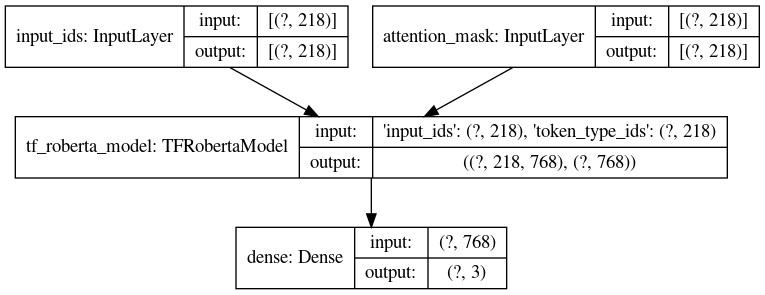

In [53]:
batch1=8*strategy.num_replicas_in_sync
batch2=4*strategy.num_replicas_in_sync

tf.keras.utils.plot_model(model,show_layer_names=True,show_shapes=True)


In [54]:
saving=tf.keras.callbacks.ModelCheckpoint('roberta.h5',save_best_only=True,save_weights_only=True,verbose=1,mode='min',monitor='val_loss')
model.fit(x=model_inputs,y=model_outputs,validation_data=(valid_inputs,valid_outputs),epochs=4,batch_size=batch1,validation_batch_size=batch2,callbacks=[saving])

Epoch 1/4
704/704 [==============================] - ETA: 0s - loss: 0.5521 - accuracy: 0.7338
Epoch 00001: val_loss improved from inf to 0.24209, saving model to roberta.h5
704/704 [==============================] - 151s 215ms/step - loss: 0.5521 - accuracy: 0.7338 - val_loss: 0.2421 - val_accuracy: 0.9010
Epoch 2/4
704/704 [==============================] - ETA: 0s - loss: 0.2290 - accuracy: 0.9096
Epoch 00002: val_loss improved from 0.24209 to 0.22587, saving model to roberta.h5
704/704 [==============================] - 92s 131ms/step - loss: 0.2290 - accuracy: 0.9096 - val_loss: 0.2259 - val_accuracy: 0.9066
Epoch 3/4
704/704 [==============================] - ETA: 0s - loss: 0.1823 - accuracy: 0.9314
Epoch 00003: val_loss improved from 0.22587 to 0.21933, saving model to roberta.h5
704/704 [==============================] - 91s 129ms/step - loss: 0.1823 - accuracy: 0.9314 - val_loss: 0.2193 - val_accuracy: 0.9095
Epoch 4/4
704/704 [==============================] - ETA: 0s - loss

In [55]:
model.load_weights('./roberta.h5')

In [56]:
model.evaluate(test_inputs,test_outputs)

94/94 [==============================] - 11s 112ms/step - loss: 0.2419 - accuracy: 0.9087


[0.24185560643672943, 0.9086666703224182]

roberta with dropout

In [65]:
tf.keras.backend.clear_session()

In [66]:
with strategy.scope():
  roberta_config=RobertaConfig.from_pretrained('roberta-base')
  roberta_model=TFRobertaModel(roberta_config)
  ins1=Input((maxlen,),dtype=tf.int32,name='input_ids')
  ins2=Input((maxlen,),dtype=tf.int32,name='attention_mask')
  pre_layers=roberta_model({'input_ids':ins1,'token_type_ids':ins2})
  x=Dropout(0.2)(pre_layers[1])
  outs=Dense(3,activation='softmax')(x)
  model=Model(inputs={'input_ids':ins1,'attention_mask':ins2},outputs=outs)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),loss='categorical_crossentropy',metrics=['accuracy'])

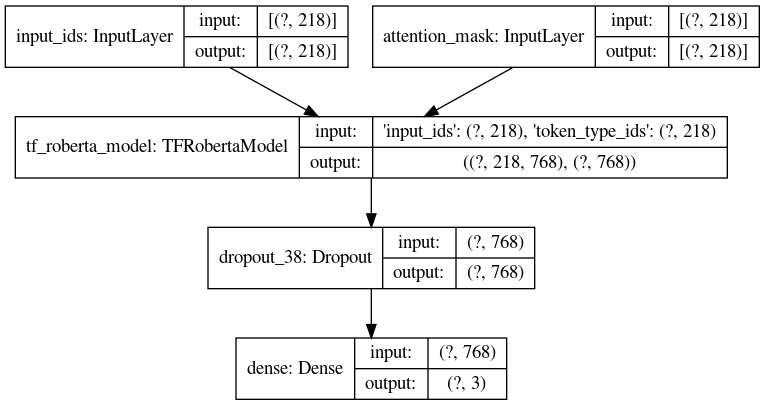

In [67]:
batch1=8*strategy.num_replicas_in_sync
batch2=4*strategy.num_replicas_in_sync

tf.keras.utils.plot_model(model,show_layer_names=True,show_shapes=True)


In [68]:
saving=tf.keras.callbacks.ModelCheckpoint('roberta2.h5',save_best_only=True,save_weights_only=True,verbose=1,mode='min',monitor='val_loss')
model.fit(x=model_inputs,y=model_outputs,validation_data=(valid_inputs,valid_outputs),epochs=6,batch_size=batch1,validation_batch_size=batch2,callbacks=[saving])

Epoch 1/6
704/704 [==============================] - ETA: 0s - loss: 0.5637 - accuracy: 0.7296
Epoch 00001: val_loss improved from inf to 0.33768, saving model to roberta2.h5
704/704 [==============================] - 147s 208ms/step - loss: 0.5637 - accuracy: 0.7296 - val_loss: 0.3377 - val_accuracy: 0.8512
Epoch 2/6
704/704 [==============================] - ETA: 0s - loss: 0.2355 - accuracy: 0.9078
Epoch 00002: val_loss improved from 0.33768 to 0.26938, saving model to roberta2.h5
704/704 [==============================] - 92s 130ms/step - loss: 0.2355 - accuracy: 0.9078 - val_loss: 0.2694 - val_accuracy: 0.8932
Epoch 3/6
704/704 [==============================] - ETA: 0s - loss: 0.1901 - accuracy: 0.9274
Epoch 00003: val_loss improved from 0.26938 to 0.22524, saving model to roberta2.h5
704/704 [==============================] - 92s 130ms/step - loss: 0.1901 - accuracy: 0.9274 - val_loss: 0.2252 - val_accuracy: 0.9116
Epoch 4/6
704/704 [==============================] - ETA: 0s - l

In [69]:
model.load_weights('./roberta2.h5')
model.evaluate(test_inputs,test_outputs)

94/94 [==============================] - 7s 72ms/step - loss: 0.2522 - accuracy: 0.9023


[0.25217992067337036, 0.9023333191871643]